In [ ]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from warnings import filterwarnings

filterwarnings(action='ignore')

In [ ]:
!kaggle datasets download -d soumendraprasad/sound-of-114-species-of-birds-till-2022

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022
License(s): CC0-1.0
100% 2.06G/2.06G [00:56<00:00, 38.4MB/s]
100% 2.06G/2.06G [00:56<00:00, 39.4MB/s]


In [ ]:
# Unzip the dataset

!unzip sound-of-114-species-of-birds-till-2022.zip

unzip:  cannot find or open sound-of-114-species-of-birds-till-2022.zip, sound-of-114-species-of-birds-till-2022.zip.zip or sound-of-114-species-of-birds-till-2022.zip.ZIP.


### **Sample Audio Checking**

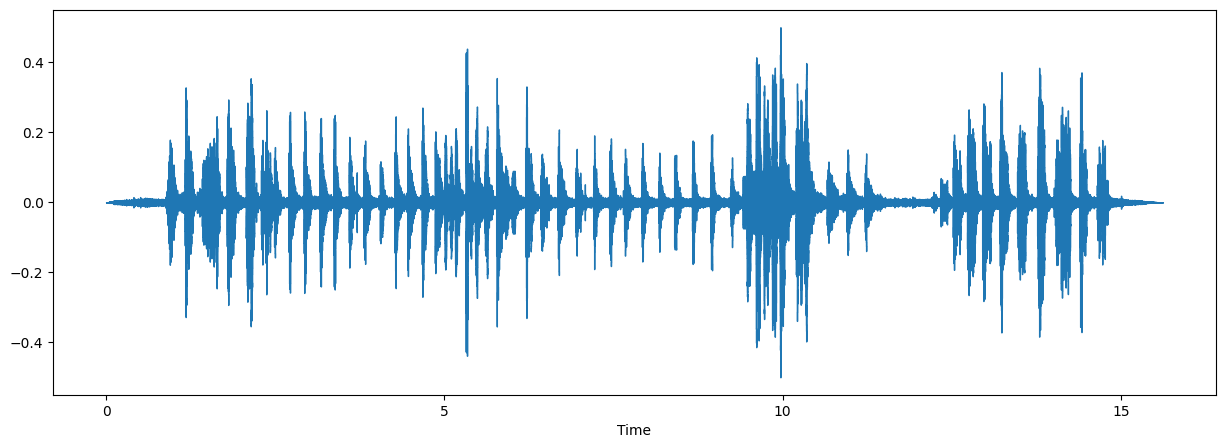

In [ ]:
# Sample Audio Checking

# Set Plot Size
plt.figure(figsize=(15,5))

# Load Audio File to extract Audio Data and Sample Rate
audio_data, sample_rate = librosa.load(path='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')
librosa.display.waveshow(y=audio_data, sr=sample_rate)

# View and Hear Audio File
IPython.display.Audio(data='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')

In [ ]:
# Audio will be automatically converted to Mono Channel [1-Dimentional Signal] Data
audio_data

array([ 8.6401997e-12, -1.2732926e-11, -1.8189894e-12, ...,
        2.2737368e-13,  3.9790393e-13, -8.5265128e-14], dtype=float32)

In [ ]:
# Audio will be automatically resampled to the rate of 22050Hz (default sr=22050)
sample_rate

22050

In [ ]:
# Sample Audio Checking
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

In [ ]:
# Sample Audio Checking
mfccs_features, mfccs_features.shape

(array([[-6.2250494e+02, -6.0999127e+02, -5.7499744e+02, ...,
         -6.2250494e+02, -6.2250494e+02, -6.2250494e+02],
        [ 0.0000000e+00,  1.6979631e+01,  4.1984955e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  1.5081112e+01,  2.0330677e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 0.0000000e+00, -7.2471941e-01,  3.1355095e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -9.6145850e-01, -1.4942662e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -1.1581554e+00, -1.6853883e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 (40, 673))

In [ ]:
# Sample Audio Checking
np.mean(mfccs_features, axis=1)     # axis=1 means row wise mean calculation - shape=(40,0)  &  axis=0 means column wise mean caculation - shape=(673,)

array([-3.0988000e+02,  1.0401821e+01, -9.0290489e+01, -4.4553432e+01,
       -1.8831221e+01,  7.9951978e+00, -1.9813393e+00, -6.6336732e+00,
       -7.9205394e+00,  1.2260886e+01,  1.1192106e+01,  1.1200221e+01,
       -3.1864741e-01,  3.7352815e+00,  5.5541916e+00,  6.4173203e+00,
        4.7119598e+00,  9.6746712e+00, -4.9129989e-02,  4.7118936e+00,
        3.7892053e+00,  8.2409830e+00,  1.1635534e+00,  4.1349072e+00,
        9.1222864e-01,  2.1938601e+00, -1.7673429e+00,  3.5073228e+00,
       -4.5820779e-01,  2.3610861e+00, -5.3835887e-01,  2.1143436e+00,
       -2.3396831e+00,  2.3190188e+00, -1.8095652e+00,  1.0630901e+00,
       -2.8051739e+00, -1.6753919e-01, -1.6882219e+00,  1.8219043e+00],
      dtype=float32)

In [ ]:
np.mean(mfccs_features, axis=1).shape

(40,)

### **Data Preprocessing**

In [ ]:
# Convert the mp3 Audio into Tensors

def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [ ]:
# Sample Audio
audio_sample = '/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3'
audio_to_tensors(audio_sample)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-302.7308    ,   70.47813   ,   13.989463  ,   28.275862  ,
          9.768283  ,    7.4185357 ,    3.6636062 ,   12.622561  ,
          0.9152409 ,    3.1517699 ,    4.532145  ,    6.7180843 ,
         -2.0768957 ,    5.589432  ,    3.097847  ,    1.8796207 ,
         -0.49634987,    6.4944406 ,    2.0897276 ,    4.1464815 ,
          2.3515277 ,    7.5341434 ,    0.6378776 ,    5.8427997 ,
          4.5193014 ,    5.5878024 ,    1.6145757 ,    6.6874557 ,
          2.1035838 ,    4.21776   ,    2.5508912 ,    4.6314435 ,
          0.40562916,    4.0922813 ,    1.5406471 ,    3.7211802 ,
          0.51732594,    3.6272905 ,    0.5613322 ,    3.1007853 ],
      dtype=float32)>

In [ ]:
# Extract the Features from Audio Files

# Audio Directory Path
directory = '/content/Voice of Birds/Voice of Birds'

extracted_features = []

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(directory))

# Initialize tqdm with the total number of files
with tqdm(total=total_files, desc='Processing files') as pbar:

  for target_class in os.listdir(directory):                               # List of All Target Folder Names in Directory

      target_class_path = os.path.join(directory, target_class)            # Make a Target Folder Path in Directory

      for audio_file in os.listdir(target_class_path):                     # List of All Audio Files in Target Folder

          audio_path = os.path.join(directory, target_class, audio_file)   # Make a Audio File Path from Target Folder in Directory

          features = audio_to_tensors(audio_path)                          # Extract the Features from the Audio File

          extracted_features.append([features, target_class])              # Append the Features and Target_Class in List

          pbar.update(1)                                                   # Update the progress bar for each file processed


Processing files: 100%|██████████| 2161/2161 [09:13<00:00,  3.91it/s]


In [ ]:
extracted_features[0]

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-258.42108   ,  100.651146  ,   25.619051  ,   20.756588  ,
           7.5461884 ,   11.51961   ,    6.212526  ,   11.468207  ,
           4.772689  ,    7.075899  ,    1.4368232 ,   10.900287  ,
          10.937303  ,   17.03163   ,   11.40106   ,   11.078227  ,
           5.781562  ,    7.4092174 ,    5.154149  ,    7.678787  ,
           5.718215  ,    4.8478193 ,    0.82553184,    0.5730335 ,
           1.4300878 ,    5.0454197 ,    3.2157896 ,    4.8075476 ,
           2.1886594 ,    2.5045323 ,    1.0851554 ,    2.4835882 ,
           1.9587976 ,    2.9845638 ,    2.6131396 ,    3.6963763 ,
           2.4081075 ,    2.7872498 ,    0.5585174 ,    2.8550746 ],
       dtype=float32)>,
 'Choco Tinamou_sound']

In [ ]:
# Creating DataFrame from Extracted Features with Class Labels

features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

,features,class
0,"(tf.Tensor(-258.42108, shape=(), dtype=float32...",Choco Tinamou_sound
1,"(tf.Tensor(-354.46667, shape=(), dtype=float32...",Choco Tinamou_sound
2,"(tf.Tensor(-258.42108, shape=(), dtype=float32...",Choco Tinamou_sound
3,"(tf.Tensor(-354.46667, shape=(), dtype=float32...",Choco Tinamou_sound
4,"(tf.Tensor(-555.19525, shape=(), dtype=float32...",Choco Tinamou_sound
...,...,...
2156,"(tf.Tensor(-474.25644, shape=(), dtype=float32...",Black Tinamou_sound
2157,"(tf.Tensor(-78.686806, shape=(), dtype=float32...",Black Tinamou_sound
2158,"(tf.Tensor(-180.19168, shape=(), dtype=float32...",Black Tinamou_sound
2159,"(tf.Tensor(-177.11519, shape=(), dtype=float32...",Black Tinamou_sound


In [ ]:
# Encoding Class Labels using LabelEncoder

target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

array([25, 25, 25, ..., 10, 10, 10])

In [ ]:
# Adding Encoded Class Labels Column to DataFrame

features_df['target'] = target_encoding.tolist()
features_df

,features,class,target
0,"(tf.Tensor(-258.42108, shape=(), dtype=float32...",Choco Tinamou_sound,25
1,"(tf.Tensor(-354.46667, shape=(), dtype=float32...",Choco Tinamou_sound,25
2,"(tf.Tensor(-258.42108, shape=(), dtype=float32...",Choco Tinamou_sound,25
3,"(tf.Tensor(-354.46667, shape=(), dtype=float32...",Choco Tinamou_sound,25
4,"(tf.Tensor(-555.19525, shape=(), dtype=float32...",Choco Tinamou_sound,25
...,...,...,...
2156,"(tf.Tensor(-474.25644, shape=(), dtype=float32...",Black Tinamou_sound,10
2157,"(tf.Tensor(-78.686806, shape=(), dtype=float32...",Black Tinamou_sound,10
2158,"(tf.Tensor(-180.19168, shape=(), dtype=float32...",Black Tinamou_sound,10
2159,"(tf.Tensor(-177.11519, shape=(), dtype=float32...",Black Tinamou_sound,10


In [ ]:
# Creating a Dictionary based on Class and Target columns for Future Prediction

prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict

{25: 'Choco Tinamou_sound',
 18: 'Buff-browed Chachalaca_sound',
 96: 'Tataupa Tinamou_sound',
 2: 'Australian Brushturkey_sound',
 65: 'Orange-footed Scrubfowl_sound',
 50: 'Lesser Rhea_sound',
 79: 'Rufous-headed Chachalaca_sound',
 14: 'Blue-throated Piping Guan_sound',
 103: 'Vanuatu Megapode_sound',
 51: 'Little Chachalaca_sound',
 59: 'Moluccan Megapode_sound',
 95: 'Tanimbar Megapode_sound',
 21: 'Chestnut-bellied Guan_sound',
 70: 'Plain Chachalaca_sound',
 87: 'Somali Ostrich_sound',
 37: 'East Brazilian Chachalaca_sound',
 100: 'Tongan Megapode_sound',
 106: 'West Mexican Chachalaca_sound',
 102: 'Undulated Tinamou_sound',
 26: 'Cinereous Tinamou_sound',
 38: 'Elegant Crested Tinamou_sound',
 31: 'Curve-billed Tinamou_sound',
 56: 'Marail Guan_sound',
 105: 'Wattled Brushturkey_sound',
 7: 'Bearded Guan_sound',
 15: 'Brazilian Tinamou_sound',
 35: 'Dwarf Cassowary_sound',
 90: 'Speckled Chachalaca_sound',
 32: 'Darwins Nothura_sound',
 1: 'Andean Tinamou_sound',
 29: 'Common 

In [ ]:
# Save to JSON File

with open(file='/content/prediction.json', mode='w') as f:
    json.dump(prediction_dict, f)

In [ ]:
# Read the Prediction_Dictionary File

with open(file='/content/prediction.json', mode='r') as f:
    prediction_dict = json.load(f)
prediction_dict

{'25': 'Choco Tinamou_sound',
 '18': 'Buff-browed Chachalaca_sound',
 '96': 'Tataupa Tinamou_sound',
 '2': 'Australian Brushturkey_sound',
 '65': 'Orange-footed Scrubfowl_sound',
 '50': 'Lesser Rhea_sound',
 '79': 'Rufous-headed Chachalaca_sound',
 '14': 'Blue-throated Piping Guan_sound',
 '103': 'Vanuatu Megapode_sound',
 '51': 'Little Chachalaca_sound',
 '59': 'Moluccan Megapode_sound',
 '95': 'Tanimbar Megapode_sound',
 '21': 'Chestnut-bellied Guan_sound',
 '70': 'Plain Chachalaca_sound',
 '87': 'Somali Ostrich_sound',
 '37': 'East Brazilian Chachalaca_sound',
 '100': 'Tongan Megapode_sound',
 '106': 'West Mexican Chachalaca_sound',
 '102': 'Undulated Tinamou_sound',
 '26': 'Cinereous Tinamou_sound',
 '38': 'Elegant Crested Tinamou_sound',
 '31': 'Curve-billed Tinamou_sound',
 '56': 'Marail Guan_sound',
 '105': 'Wattled Brushturkey_sound',
 '7': 'Bearded Guan_sound',
 '15': 'Brazilian Tinamou_sound',
 '35': 'Dwarf Cassowary_sound',
 '90': 'Speckled Chachalaca_sound',
 '32': 'Darwins

In [ ]:
# Converting Features into List
features = features_df['features'].tolist()
features

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-258.42108   ,  100.651146  ,   25.619051  ,   20.756588  ,
           7.5461884 ,   11.51961   ,    6.212526  ,   11.468207  ,
           4.772689  ,    7.075899  ,    1.4368232 ,   10.900287  ,
          10.937303  ,   17.03163   ,   11.40106   ,   11.078227  ,
           5.781562  ,    7.4092174 ,    5.154149  ,    7.678787  ,
           5.718215  ,    4.8478193 ,    0.82553184,    0.5730335 ,
           1.4300878 ,    5.0454197 ,    3.2157896 ,    4.8075476 ,
           2.1886594 ,    2.5045323 ,    1.0851554 ,    2.4835882 ,
           1.9587976 ,    2.9845638 ,    2.6131396 ,    3.6963763 ,
           2.4081075 ,    2.7872498 ,    0.5585174 ,    2.8550746 ],
       dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-3.5446667e+02,  3.1972893e+01, -4.6739983e+01, -3.9783882e+01,
        -4.3795860e+01,  2.8890503e+01, -3.3595271e+00,  5.5716625e+01,
        -1.2093920e+01, -2.0977551e-01,  3.7377982e+00,

In [ ]:
# Converting Targets into Lists
target = features_df['target'].tolist()
print(target)

[25, 25, 25, 25, 25, 25, 25, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 50, 50, 50, 50, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 103, 103, 103, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 59, 59, 59, 59, 59, 59, 95, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 87, 37, 37, 37, 37, 

In [ ]:
# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)
features_tensor

<tf.Tensor: shape=(2161, 40), dtype=float32, numpy=
array([[-258.42108  ,  100.651146 ,   25.619051 , ...,    2.7872498,
           0.5585174,    2.8550746],
       [-354.46667  ,   31.972893 ,  -46.739983 , ...,    1.7488695,
          -1.6868631,   -1.0052664],
       [-258.42108  ,  100.651146 ,   25.619051 , ...,    2.7872498,
           0.5585174,    2.8550746],
       ...,
       [-180.19168  ,   71.419876 ,   -3.5283906, ...,   -1.0424783,
           3.396132 ,    3.7068942],
       [-177.11519  ,  -61.498215 ,  -47.067993 , ...,    1.4583523,
          -2.2352624,    7.4782987],
       [-184.55376  ,   84.30478  ,   -1.2400599, ...,    1.4299803,
          -2.6109657,    1.8722503]], dtype=float32)>

In [ ]:
target_tensor

<tf.Tensor: shape=(2161,), dtype=int32, numpy=array([25, 25, 25, ..., 10, 10, 10], dtype=int32)>

In [ ]:
# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 68
    train_batch_count = int(dataset_batch_count * train_size)                           # int(68*0.8) ---> 54 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(68*0.1) ---> 6 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 54 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 14 Batches ---> Next 6 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 8 Batches are Testing

    return train_ds, validation_ds, test_ds

In [ ]:
# Apply the Function in Audio Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(40,)
[-4.1592395e+02  6.8622032e+01 -1.4363232e+01 -3.9934464e+01
 -1.4102064e+01  6.0846319e+00 -2.2012997e+01 -9.9672871e+00
  2.4680524e+00 -1.2804578e+01 -4.5280547e+00 -3.7158637e+00
 -5.8649888e+00  5.4325714e+00 -1.0947729e+01 -4.1180782e+00
 -1.1042986e+01 -3.7576206e+00 -6.6931520e+00  1.3088374e+00
 -4.1042724e+00 -2.1657355e+00 -3.5156958e+00 -3.9481950e+00
 -5.7228346e+00  5.4930573e+00 -4.9130692e+00 -1.4235693e-01
 -3.2257299e+00 -5.3422561e+00 -4.0656137e+00 -8.4028415e-02
 -4.2715859e-01 -1.2530905e+00 -2.6875284e+00 -1.2702994e+00
 -6.3061728e+00  2.7835319e+00 -4.3483744e+00  2.8388937e+00]

(32,)
111



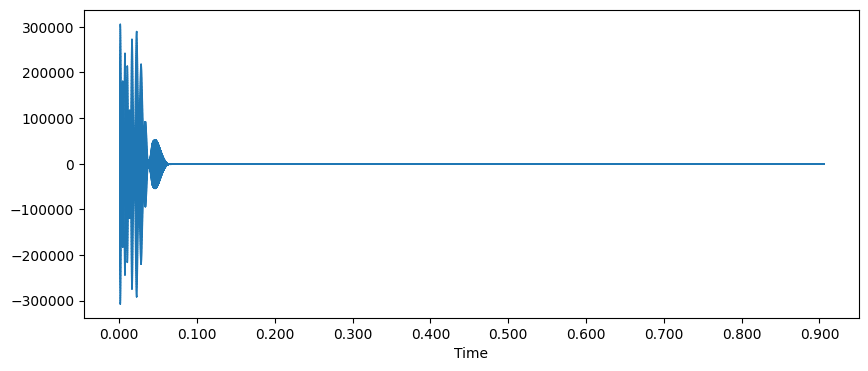

In [ ]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for audio_batch, label_batch in train_ds.take(1):
    print(audio_batch.numpy()[0].shape)
    print(audio_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    audio = librosa.feature.inverse.mfcc_to_audio(audio_batch.numpy())

    # Plot the reconstructed audio waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio)
    plt.show()

In [ ]:
# Overview of Training Dataset Structure and Specifications
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

### **Model Building & Training**

In [ ]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

(40, 1)

In [ ]:
# Build a CNN Model Architecture

model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

<Sequential name=sequential, built=True>

In [ ]:
# Display the Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 17, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 9, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 7, 256)              │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 114)                 │          58,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,144,434 (4.37 MB)

 Trainable params: 1,143,154 (4.36 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [ ]:
# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2879 - loss: 14.3514 - val_accuracy: 0.4115 - val_loss: 14.3028
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3253 - loss: 14.2622 - val_accuracy: 0.4115 - val_loss: 14.2357
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.2702 - loss: 14.3692 - val_accuracy: 0.4375 - val_loss: 14.1731
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.3180 - loss: 14.1860 - val_accuracy: 0.4375 - val_loss: 14.1020
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2884 - loss: 14.1944 - val_accuracy: 0.4583 - val_loss: 14.0434
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.3215 - loss: 14.0994 - val_accuracy: 0.4479 - val_loss: 13.9777
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3141 - loss: 14.0197 - val_accuracy: 0.4427 - val_loss: 13.9149
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.3330 - loss: 13.9287 - v

In [ ]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8064 - loss: 10.2503


[10.761566162109375, 0.73046875]

In [ ]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 100, 'steps': 54}

In [ ]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
len(acc), len(val_acc), len(loss), len(val_loss)

(100, 100, 100, 100)

In [ ]:
# Save the Model
model.save('/content/model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

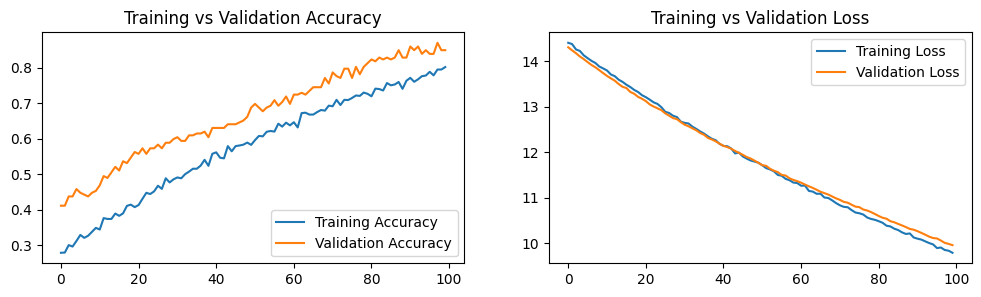

In [ ]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [ ]:
def prediction(audio_file):

    # Load the Prediction JSON File to Predict Target_Label
    with open('/content/prediction.json', mode='r') as f:
        prediction_dict = json.load(f)

    # Extract the Audio_Signal and Sample_Rate from Input Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Reshape MFCC features to match the expected input shape for Conv1D both batch & feature dimension
    mfccs_features = np.expand_dims(mfccs_features, axis=0)
    mfccs_features = np.expand_dims(mfccs_features, axis=2)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    # Load the Model and Prediction
    model = tf.keras.models.load_model('/content/model.h5')
    prediction = model.predict(mfccs_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name using Prediction_dict
    predicted_class = prediction_dict[str(target_label)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confidence : {confidence}%')

In [ ]:
audio_file_path = '/content/Voice of Birds/Voice of Birds/Dwarf Tinamou_sound/Dwarf Tinamou31.mp3'
prediction(audio_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted Class : Dwarf Tinamou_sound
Confidence : 64.56%


In [ ]:
audio_file_path = '/content/Voice of Birds/Voice of Birds/Rufous-bellied Chachalaca_sound/Rufous-bellied Chachalaca19.mp3'
prediction(audio_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Predicted Class : Rufous-bellied Chachalaca_sound
Confidence : 87.45%


In [ ]:
audio_file_path = '/content/Voice of Birds/Voice of Birds/Puna Tinamou_sound/Puna Tinamou8.mp3'
prediction(audio_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Predicted Class : Puna Tinamou_sound
Confidence : 92.21%


In [ ]:
audio_file_path = '/content/Voice of Birds/Voice of Birds/Grey Tinamou_sound/Grey Tinamou26.mp3'
prediction(audio_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted Class : Grey Tinamou_sound
Confidence : 54.35%


In [ ]:
audio_file_path = '/content/Voice of Birds/Voice of Birds/Puna Tinamou_sound/Puna Tinamou7.mp3'
prediction(audio_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predicted Class : Puna Tinamou_sound
Confidence : 91.46%


In [ ]:
# Get a list of audio files in the directory
directory = '/content/Voice of Birds/Voice of Birds'
audio_files = []
for root, _, files in os.walk(directory):
    for file in files:
        if file.endswith('.mp3'):  # Consider only MP3 files
            audio_files.append(os.path.join(root, file))

# Select a few random audio files for prediction
import random
selected_files = random.sample(audio_files, 5)  # Select 5 random files

# Perform prediction on the selected files
for audio_file_path in selected_files:
    print(f"Predicting for: {audio_file_path}")
    prediction(audio_file_path)
    print("-" * 30)  # Separator for better readability

Predicting for: /content/Voice of Birds/Voice of Birds/Tongan Megapode_sound/Tongan Megapode4.mp3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted Class : Tongan Megapode_sound
Confidence : 42.84%
------------------------------
Predicting for: /content/Voice of Birds/Voice of Birds/West Mexican Chachalaca_sound/West Mexican Chachalaca5.mp3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicted Class : West Mexican Chachalaca_sound
Confidence : 34.49%
------------------------------
Predicting for: /content/Voice of Birds/Voice of Birds/Southern Cassowary_sound/Southern Cassowary2.mp3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Predicted Class : Australian Brushturkey_sound
Confidence : 9.71%
------------------------------
Predicting for: /content/Voice of Birds/Voice of Birds/White-winged Guan_sound/White-winged Guan4.mp3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Predicted Class : White-winged Guan_sound
Confidence : 83.76%
------------------------------
Predicting for: /content/Voice of Birds/Voice of Birds/Cinereous Tinamou_sound/Cinereous Tinamou15.mp3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Predicted Class : Cinereous Tinamou_sound
Confidence : 84.9%
------------------------------
